In [1]:
!pip install wordcloud

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
reviews = pd.read_csv("/Users/michielvstaden/IdeaProjects/MIT805exam/src/main/java/input/train.csv", names=['polarity', 'title', 'text'], header=None)

In [5]:
print(reviews)

         polarity                                              title  \
0               2                     Stuning even for the non-gamer   
1               2              The best soundtrack ever to anything.   
2               2                                           Amazing!   
3               2                               Excellent Soundtrack   
4               2  Remember, Pull Your Jaw Off The Floor After He...   
...           ...                                                ...   
3599995         1                                      Don't do it!!   
3599996         1                      Looks nice, low functionality   
3599997         1                         compact, but hard to clean   
3599998         1                                 what is it saying?   
3599999         2              Makes My Blood Run Red-White-And-Blue   

                                                      text  
0        This sound track was beautiful! It paints the ...  
1        I'm 

In [6]:
str(reviews)

"         polarity                                              title  \\\n0               2                     Stuning even for the non-gamer   \n1               2              The best soundtrack ever to anything.   \n2               2                                           Amazing!   \n3               2                               Excellent Soundtrack   \n4               2  Remember, Pull Your Jaw Off The Floor After He...   \n...           ...                                                ...   \n3599995         1                                      Don't do it!!   \n3599996         1                      Looks nice, low functionality   \n3599997         1                         compact, but hard to clean   \n3599998         1                                 what is it saying?   \n3599999         2              Makes My Blood Run Red-White-And-Blue   \n\n                                                      text  \n0        This sound track was beautiful! It paints the ...

In [7]:
type(reviews)

pandas.core.frame.DataFrame

In [8]:
reviews.describe()

,polarity
count,3600000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


In [9]:
reviews.size

10800000

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [11]:
reviews.shape

(3600000, 3)

In [12]:
reviews.polarity.value_counts()

2    1800000
1    1800000
Name: polarity, dtype: int64

In [13]:
reviews.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [14]:
documents = reviews.text

vectorizer_tfidf = TfidfVectorizer(min_df = 5,
                                   max_df = 0.95,
                                   max_features = 5000,
                                  stop_words='english')
vectorizer_tfidf.fit(documents)
X_tfidf = vectorizer_tfidf.transform(documents)
print("Transformed Data Size: {}".format(X_tfidf.shape))
tfidf_feature_names = vectorizer_tfidf.get_feature_names()

Transformed Data Size: (3600000, 5000)


In [15]:
cluster_labels = reviews.polarity
cluster_labels.describe()

count    3600000.0
mean           1.5
std            0.5
min            1.0
25%            1.0
50%            1.5
75%            2.0
max            2.0
Name: polarity, dtype: float64

In [16]:
print(cluster_labels)

0          2
1          2
2          2
3          2
4          2
          ..
3599995    1
3599996    1
3599997    1
3599998    1
3599999    2
Name: polarity, Length: 3600000, dtype: int64


In [17]:
random_sample = np.random.choice(range(X_tfidf.shape[0]), size=2000, replace=False)
X_tfidf_sample = X_tfidf[random_sample,:]
cluster_labels_sample = cluster_labels[random_sample].reset_index()["polarity"]
print(X_tfidf_sample)

  (0, 4956)	0.15903626703786633
  (0, 4732)	0.08860462659876506
  (0, 4725)	0.13947228833168362
  (0, 4724)	0.13418696008701947
  (0, 4486)	0.08042634077743437
  (0, 4316)	0.13032257486216312
  (0, 4294)	0.09999225486648851
  (0, 4247)	0.14187592968910995
  (0, 4226)	0.14302605697889215
  (0, 4156)	0.11180623064214652
  (0, 4133)	0.13235549884802214
  (0, 4130)	0.1032847233800305
  (0, 4070)	0.09177298916101814
  (0, 3616)	0.12088269742938468
  (0, 3588)	0.23613185750628882
  (0, 3585)	0.1153765817627384
  (0, 3581)	0.07480851678180216
  (0, 3556)	0.06299711488790277
  (0, 3538)	0.16593328784476824
  (0, 3500)	0.1070762074790159
  (0, 3476)	0.08696126097078204
  (0, 3403)	0.0899286618618678
  (0, 3278)	0.39040972380990513
  (0, 3266)	0.2154872792454109
  (0, 2915)	0.07875082744835402
  :	:
  (1999, 3193)	0.14491974346794118
  (1999, 3187)	0.1573545913845705
  (1999, 3071)	0.11275412350935081
  (1999, 2973)	0.18338847015523624
  (1999, 2962)	0.08659283241625002
  (1999, 2930)	0.39863282

In [18]:
cluster_labels_sample.describe()

count    2000.000000
mean        1.491500
std         0.500053
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: polarity, dtype: float64

In [19]:
cluster_labels_sample.value_counts()

1    1017
2     983
Name: polarity, dtype: int64

In [20]:
print(cluster_labels_sample)

0       2
1       2
2       1
3       2
4       1
       ..
1995    2
1996    2
1997    2
1998    1
1999    2
Name: polarity, Length: 2000, dtype: int64


In [21]:
X_tfidf_dense = X_tfidf_sample.toarray()
# X_pca = PCA(n_components=1, random_state=0).fit_transform(X_tfidf_dense)
# X_tsne = TSNE(n_components=1, random_state=0).fit_transform(X_tfidf_sample)
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_tfidf_sample)

In [22]:
print(X_tfidf_dense)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


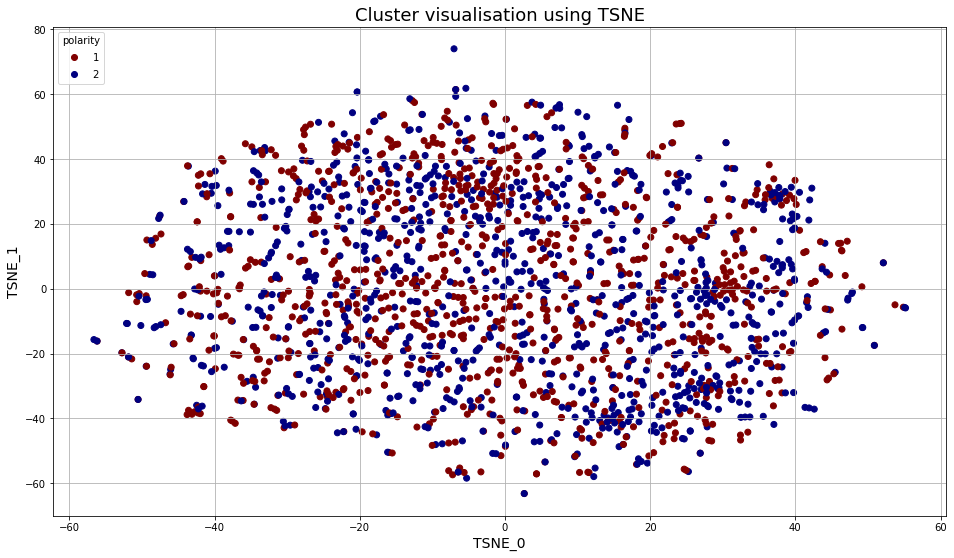

In [23]:
figsize(16,9)
# scatter = plt.scatter(X_pca[:,0],X_tsne[:,0], c=cluster_labels_sample,cmap='jet_r') # cmap is the color map for the plot
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels_sample,cmap='jet_r') # cmap is the color map for the plot
plt.grid()
plt.title("Cluster visualisation using TSNE", fontsize=18)
plt.xlabel("TSNE_0",fontsize=14)
plt.ylabel("TSNE_1",fontsize=14)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="polarity")

In [24]:
# Helper function to visualize the topics/themes
def wordcloud_top_words(X, clusters, labels, n_terms):
    df = pd.DataFrame(X.todense()) # Convert our data TFIDF data to a dataframe
    df = df.groupby(clusters).mean() # Group by clustes and ccalculate the mean per feature (word)
    
    for i,r in df.iterrows():
        cmap = matplotlib.cm.get_cmap('jet_r')
        rgba = cmap((i-1)/max(clusters-1),bytes=True)
        def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
            return(rgba)

        cloud_text = " ".join([labels[t] for t in np.argsort(r)[-n_terms:]])
        # Create the wordcloud object
        wordcloud = WordCloud(width=480, height=480, margin=0,background_color = 'white').generate(cloud_text)
        fig1, ax1 = plt.subplots()
        # Display the generated image:
        ax1.imshow(wordcloud.recolor(color_func = color_func), interpolation='bilinear')
        ax1.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("polarity %s" % i,fontsize = 12)

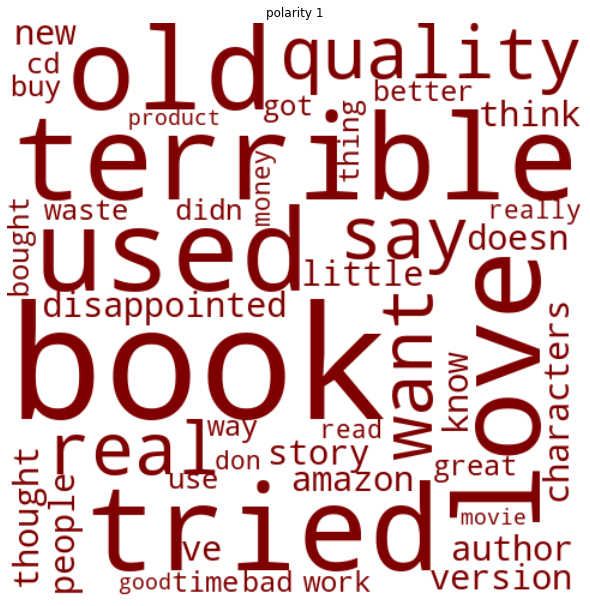

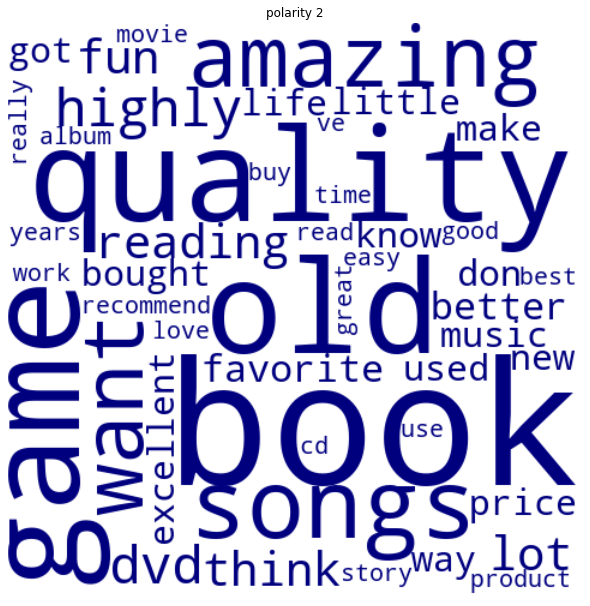

In [25]:
figsize(8,8)
wordcloud_top_words(X_tfidf_sample, cluster_labels_sample, vectorizer_tfidf.get_feature_names(), 50)